# DTSA-5509 Final Project - Surviving the Titanic

## 1) Project Topic

This is the final project for DTSA-5509, Introduction to Machine Learning: Supervised Learning.

The selected topic is the famous sinking of the Titanic. Specifically, this will be a classification problem.  Given data from the passenger manifest, construct a classification model that will predict the likelihood of survival given certain factors numerical (ex: age) and categorical factors (ex: gender, first/second/third class ticket).  To do this, I will compare both an Adaboost prediction versus a random forest to determine which gives the best prediction.    

There are three reasons that I have selected this topic for the final project.  First and most obvious, to apply the lessons learned during the semester to a real-world scenario.  The second reason this topic was selected was to learn the importance of having local knowledge of the target problem to better understand the data and the results.  It will be important to know some of the historical facts about the Titanic to understand the data (for example why women were more likely to survive than men).  Also important is the layout of the ship (specifically the locations of the cabins for each class of passenger).  Thirdly, what can be learned from the analysis?  Does this model generalize to other similar disasters of this era (for example the sinking of the Lusitania) or even closer to the present day (the sinking of the Costa Concordia in 2012).  

GitHub repository link:
https://github.com/doctorterry/cu-dtsa5509-Final

Link to the dataset:
https://www.kaggle.com/competitions/titanic/data?select=train.csv

Wiki page for the Titanic:
https://en.wikipedia.org/wiki/Titanic

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

## 2) Data

The Titanic passenger data is a CSV format table that consists of 12 columns and 418 entry rows.  The total amount of possible data entries are equal to 5016 (though some are null values and need to be cleaned).   

In [2]:
data = pd.read_csv("Titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Below is a summary of the data categories:

| Column Name | Data Type   | Description                                                          |
| ----------- | ---------   | -------------------------------------------------------------------- |
| Passengerid | Numerical   | A passenger identifier number                                        | 
| Survived    | Numerical   | Survived the sinking (0 = Dead 1 = Alive)                            |
| Pclass      | Numerical   | Ticket class (1 = First class, 2 = Second class, 3 = Third class)    |
| Name        | Numerical   | Name of the passenger                                                |
| Sex         | Categorical | Passenger gender                                                     |
| Age         | Numerical   | Age of passenger in years.                                           |
| SibSp       | Numerical   | Number of siblings or spouses aboard the ship.                       |
| Parch       | Numerical   | Number of parents or children aboard the ship.                       |
| Ticket      | Numerical   | Ticket identifier number.                                            |
| Fare        | Numerical   | Amount paid for the ticket (in pounds)                               |
| Cabin       | Categorical | Cabin number                                                         |
| Embarked    | Categorical | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |

## 3) Data Cleaning

Reviewing the data, it is easy to observe that there are many null values that will need to be cleaned.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We will first confirm that all possible types of null values are counted.

In [6]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
nulldemo = pd.DataFrame(a)

for c in data.columns:
    string_null = np.array([x in a[2:] for x in data[c]])
    print(c, data[c].isnull().sum(), string_null.sum()) 

PassengerId 0 0
Survived 0 0
Pclass 0 0
Name 0 0
Sex 0 0
Age 177 0
SibSp 0 0
Parch 0 0
Ticket 0 0
Fare 0 0
Cabin 687 0
Embarked 2 0


The above counts shows that the supported 'NaN' is the only null value used in the table.

As a simple sanity check to confirm that the above counts agree with the count provided by the supported function. 

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We will first begin to correct the data present in the "Age" column.  Although a sizeable amount of data is null (slightly above 20%), this is a far too important data column to remove. 

We can see from the below graph that the data if fairly normally distributed (though it does skew towards higher ages which is expected).  Both the median and the mean are relatively similar values.

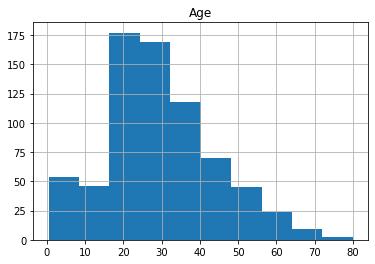

Mean = 29.69911764705882
Median = 28.0


In [8]:
data["Age"].hist()
plt.title("Age")
plt.show()

print("Mean = " + str(data["Age"].mean()))
print("Median = " + str(data["Age"].median()))

The mean value is used to fill in the missing data in the "Age" column (though median would have been perfectly appropriate too in this scenario).  

In [9]:
data["Age"].fillna(data["Age"].mean(), inplace=True)

data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We will next look to correct the missing value in the "Embarked" column. We could simply decide to drop those two frames.  However before making this decision, let us examine the numbers.

In [10]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Given the overwhelming majority of passengers boarded in Southampton, it is safe to assume that the two individuals most likely boarded there too.

In [11]:
data['Embarked'].fillna("S", inplace=True)

data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

We must now consider the cabin data.  Displayed below are the various assignments.  

Each cabin number begins with the deck level.  Access to the various decks, both for accomadations and leisure, were based on the class of ticket purchased.  

In [12]:
data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

The below table describes each level as well as which class of passenger would have rooms or access to leisure facilities.

| Deck | Room Access  | Leisure Areas  |
| -----| ------------ | -------------- |
| A    | 1            | 1              | 
| B    | 1            | 1, 2           |
| C    | 1, 3         | 1, 2, 3        | 
| D    | 1, 2, 3      | 1, 2, 3        | 
| E    | 1, 2, 3      | 3              | 
| F    | 2, 3         | 1, 2           | 
| G    | 2, 3         | 1, 2           | 

Source:
https://jamescameronstitanic.fandom.com/wiki/Titanic_Decks

For a visual diagram of the deck layout please see the below link:

<img src="img/Titanic_diagram.png" width=400 height=400 />

Source:
https://en.wikipedia.org/wiki/First-class_facilities_of_the_Titanic#/media/File:Olympic_&_Titanic_cutaway_diagram.png

This information could be quite useful.  However, approximately 78% of the entries in this column are null values.  

Let us look at the statistics for the amount of actual cabin information versus null information based on "Pclass" data.

In [13]:
cabin_count_NA = data.loc[data['Cabin'].isna()]
cabin_count_NA["Pclass"].value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

In [14]:
cabin_count = data.loc[data['Cabin'].notna()]
cabin_count["Pclass"].value_counts()

1    176
2     16
3     12
Name: Pclass, dtype: int64

Missing "Cabin" data is highly skewed towards 2nd and 3rd class passengers.  Although interesting, there is simply to much missing data.  Given what we know about the ship layout as well as deck access, we will drop this column in favour of using ticket class information.  

Note that this is actual an important area of current research in regards to the Titanic.  Maybe in a future study this data will be more reliable.

In [15]:
data.drop(['Cabin'], axis=1, inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [16]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We are also going to remove both the "PassengerId" and "Ticket" column.  We can determine both from the correlation matrix but also from knowledge of the event that these do not provide any useful information for the analysis.

In [17]:
corr1 = data.corr()
corr1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [18]:
data.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


We will now convert categorical variables into numerical to assist in the analysis.  

To start, we will convert the "Sex" column.  Since this is a binary choice, we will encode to a single column so that male is 1 and female is 0.

In [19]:
#data['Sex'].replace(['male', 'female'], [1, 0], inplace=True)
data = pd.get_dummies(data, columns=["Sex"], drop_first=True)

We will next one-hot encode the "Embarked" column.

In [20]:
#data['Embarked'].replace(['C', 'Q', 'S'], [0, 1, 2], inplace=True)
data = pd.get_dummies(data, columns=["Embarked"])

data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,0,1


Although at first glance numerical, the "Pclass" column is really a categorical column that uses numbers to categorize. To better model the data, let us encode this data as well.

In [21]:
data = pd.get_dummies(data, columns=["Pclass"])

data.head()

,Survived,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,0,1,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,1,0,0,1,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,0,1,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,0,1,1,0,0
4,0,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,0,1,0,0,1


The final step of the data cleaning will consider the "Name" data column.  On the surface, this data would not seem overly useful.  However, looking at the title in front of each name may provide some additional useful info.

In [22]:
data.Name.str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.strip().value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: 0, dtype: int64

Most of the titles are fairly normal.  However some of the outliers are interesting.  These show that the individual was of of a certain social status (ex: nobility) or perhaps an officer of some type.

We are going to make use of this data by assigning individuals to 1 of 3 variables in a new column called "Status":

1. Nobility
2. Officer (note that I include the priesthood and doctors in this designation)
3. Civilian

In [23]:
data['SocStatus'] = data.Name.str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.strip().replace({'Mr': 'C', 'Miss': 'C', 'Mrs': 'C', 'Master': 'C', 'Dr': 'O', 'Rev': 'O', 'Mlle': 'C', 'Major': 'O', 'Col': 'O', 'the Countess': 'N', 'Capt': 'O', 'Ms': 'C', 'Sir': 'N', 'Lady': 'N', 'Mme': 'C', 'Don': 'N', 'Jonkheer': 'N'})

data.head()

,Survived,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,SocStatus
0,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,0,1,0,0,1,C
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,1,0,0,1,0,0,C
2,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,0,1,0,0,1,C
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,0,1,1,0,0,C
4,0,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,0,1,0,0,1,C


Although this could have been done above, for simplicity sake we will now convert these categorical variables to numerical for better analysis.

0 = Nobility (N)
1 = Officer (O)
2 = Civilian (C)

In [24]:
#data['SocStatus'].replace(['N', 'O', 'C'], [0, 1, 2], inplace=True)
data = pd.get_dummies(data, columns=["SocStatus"])

data.head()

,Survived,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,SocStatus_C,SocStatus_N,SocStatus_O
0,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,0,1,0,0,1,1,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,1,0,0,1,0,0,1,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,0,1,0,0,1,1,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,0,1,1,0,0,1,0,0
4,0,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,0,1,0,0,1,1,0,0


We will now drop the "Name" column from the data

In [25]:
data.drop(['Name'], axis=1, inplace=True)
data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,SocStatus_C,SocStatus_N,SocStatus_O
0,0,22.0,1,0,7.2500,1,0,0,1,0,0,1,1,0,0
1,1,38.0,1,0,71.2833,0,1,0,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,0,1,1,0,0
3,1,35.0,1,0,53.1000,0,0,0,1,1,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,0,1,0,0,1,1,0,0


## 4) Exploratory Data Analysis

We will first begin our exploration of the data by viewing the correlation matrix (both in table and heatmap form).

In [26]:
corr2 = data.corr()
corr2

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,SocStatus_C,SocStatus_N,SocStatus_O
Survived,1.000000,-0.069809,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.149683,0.285904,0.093349,-0.322308,0.012054,0.033391,-0.031316
Age,-0.069809,1.000000,-0.232625,-0.179191,0.091566,0.084153,0.032024,-0.013855,-0.019336,0.319916,0.006589,-0.281004,-0.189872,0.068799,0.177484
SibSp,-0.035322,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.068734,-0.054582,-0.055932,0.092548,0.025874,-0.008384,-0.024712
Parch,0.081629,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.060814,-0.017633,-0.000734,0.015790,0.059535,-0.035583,-0.048211
Fare,0.257307,0.091566,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.162184,0.591711,-0.118557,-0.413333,-0.016275,0.015044,0.010357
Sex_male,-0.543351,0.084153,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.119224,-0.098013,-0.064746,0.137143,-0.075638,-0.007483,0.089228
Embarked_C,0.168240,0.032024,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.782742,0.296423,-0.125416,-0.153329,-0.030095,0.079020,-0.008034
Embarked_Q,0.003650,-0.013855,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.499421,-0.155342,-0.127301,0.237449,-0.000311,-0.023105,0.012618
Embarked_S,-0.149683,-0.019336,0.068734,0.060814,-0.162184,0.119224,-0.782742,-0.499421,1.000000,-0.161921,0.189980,-0.015104,0.026561,-0.054685,-0.000902
Pclass_1,0.285904,0.319916,-0.054582,-0.017633,0.591711,-0.098013,0.296423,-0.155342,-0.161921,1.000000,-0.288585,-0.626738,-0.155640,0.132798,0.104919


<AxesSubplot:>

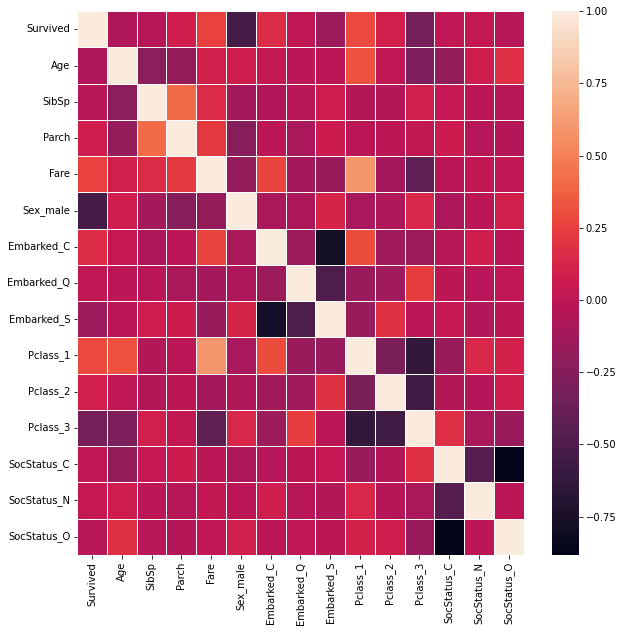

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(corr2, linewidths=1)

Looking specifically at the absolute values of the data, the top 4 factors that seem to be most correlated with surviving the shipwreck (in order):

1. Sex_male (negative)
2. Pclass_3 (negative)
3. Pclass_1 (positive)
4. Fare (positive)

So other than gender, it seems that surviving was correlated to what was paid. 

Let us examine some of the two non-binary numerical data columns (Age, Fare) as it relates to survival to notice any trends.

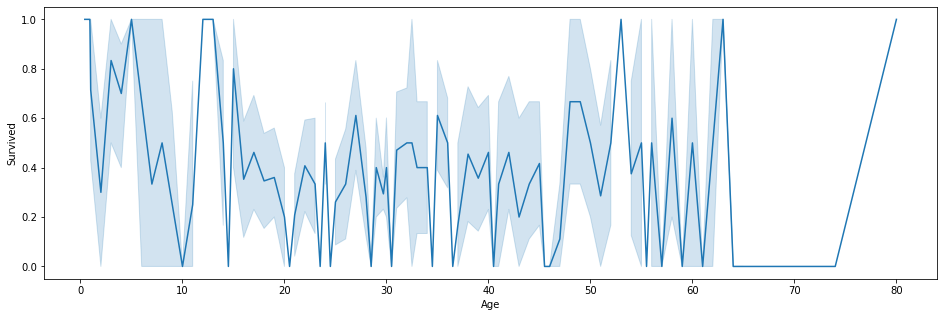

In [28]:
plt.figure(figsize=(16,5))
sns.lineplot(x="Age", y="Survived", data=data)
plt.show()

Beginning with age, we can see from this graph that there is a great deal of noise in this graph. Only in the high age bracket (60 and above) do we see a more flat graph.  However, this is also due to the low number of individuals in this age bracket (as shown in the below histogram).

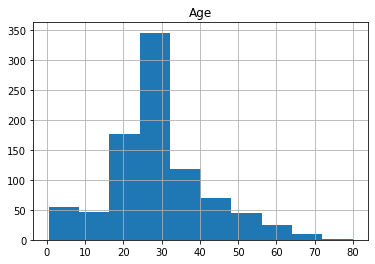

In [29]:
data["Age"].hist()
plt.title("Age")
plt.show()

Now let us examine the relation of the fare paid to survival.

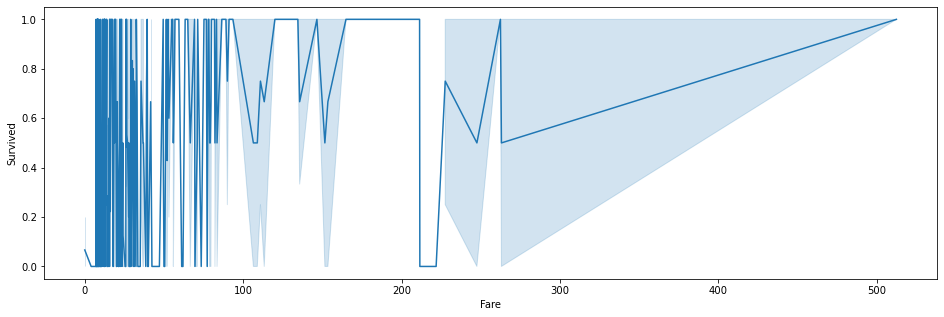

In [30]:
plt.figure(figsize=(16,5))
sns.lineplot(x="Fare", y="Survived", data=data)
plt.show()

Below 100 pounds, this is some very noisy data. Above this value the graph becomes far less noisy.  However, looking at the counts of passengers who paid less than 100 pounds, it is a significant majority.

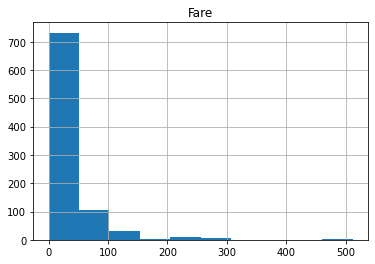

Number of passengers who paid less than 100 pounds: 


Fare
True     838
False     53
dtype: int64

In [31]:
data["Fare"].hist()
plt.title("Fare")
plt.show()

print("Number of passengers who paid less than 100 pounds: ")
data.value_counts(data["Fare"] < 100)

There do still remain some variables that are moderately to highly correlated. Some are expected, such as the categorical variables that were split into separate columns. Being mutually exclusive, these would definetely have an effect on each other.

In another case, "Fare" is quite possitively correlated to "Pclass_1".  This may be expected, but also may need to be considered to avoid overfitting.

Lastly, "Parch" and "SibSp" are fairly correlated. Given that both these columns describe whether the passenger is travelling alone or not, we may examine this more in the next section for some feature engineering.

## 5) Models

In this section, we will begin to build our classification models. Both an Adaboost and Random Forest model will be used. 

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [33]:
y1 = data["Survived"]
X1 = data.drop(["Survived"], axis=1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

We will now construct an AdaBoost classifier (with default settings) to make some predictions.

In [34]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=1234).fit(X1_train, y1_train)
res_abc = abc.predict(X1_test)
score_abc = abc.score(X1_test, y1_test)
print("AdaBoost score = " + str(score_abc))

AdaBoost score = 0.7988826815642458


This is a decent prediction. Let us see if we can improve the score.

In [56]:
'''
n_estimators = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
learning_rate = [1.0, 5.0, 10.0, 100.0]
algorithm = ['SAMME.R', 'SAMME']
random_state = [1234]

abc_random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'algorithm': algorithm,
               'random_state': random_state
              }

abc_test1 = AdaBoostClassifier()
abc_random = RandomizedSearchCV(estimator = abc_test1, param_distributions = abc_random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
abc_random.fit(X1_train, y1_train)
abc_random.best_params_
'''

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'random_state': 1234,
 'n_estimators': 200,
 'learning_rate': 1.0,
 'algorithm': 'SAMME'}

We will use the above best parameters to select a smaller range of values to use with the GridSearch to improve our AdaBoost Classifier.

Note that I have the block of code commented out. This can take some time and is only meant to determine the best values. Uncomment if you wish to test.

In [57]:
'''

abc_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [1.0, 2.0, 3.0, 4.0, 5.0],
    'algorithm': ['SAMME'],
    'random_state': [1234]
}
abc_test2 = AdaBoostClassifier()

# Instantiate the grid search model
abc_grid_search = GridSearchCV(estimator = abc_test2, param_grid = abc_param_grid, cv = 3, n_jobs = -1, verbose = 2)
abc_grid_search.fit(X1_train, y1_train)
abc_grid_search.best_params_
'''

Fitting 3 folds for each of 15 candidates, totalling 45 fits


{'algorithm': 'SAMME',
 'learning_rate': 1.0,
 'n_estimators': 200,
 'random_state': 1234}

Let us verify if the score has improved.

In [59]:
abc_f = AdaBoostClassifier(n_estimators=200, learning_rate=1.0, random_state=1234, algorithm='SAMME').fit(X1_train, y1_train)
score_abc_f = abc_f.score(X1_test, y1_test)
print("AdaBoost score = " + str(score_abc_f))

AdaBoost score = 0.7988826815642458


We will now construct an Random Forest classifier (with default settings) to make some predictions.

In [38]:
rfc = RandomForestClassifier(random_state=1234).fit(X1_train, y1_train)
res_rfc = rfc.predict(X1_test)
score_rfc = rfc.score(X1_test, y1_test)
print("Random Forest score = " + str(score_rfc))

Random Forest score = 0.8379888268156425


Again, let us try to improve this score by first doing a randomized search to get a range of values.

In [39]:
'''
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
max_features = ['sqrt', 'log2', None]
max_depth = [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
ccp_alpha = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.010, 0.011, 0.012, 0.013, 0.014, 0.015]
random_state = [1234]

rfc_random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'ccp_alpha': ccp_alpha,
               'random_state': random_state
              }

rfc_test1 = RandomForestClassifier()
rfc_random = RandomizedSearchCV(estimator = rfc_test1, param_distributions = rfc_random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_random.fit(X1_train, y1_train)
rfc_random.best_params_
'''

"\nn_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]\nmax_features = ['sqrt', 'log2', None]\nmax_depth = [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]\nmin_samples_split = [2, 5, 10]\nmin_samples_leaf = [1, 2, 4]\nbootstrap = [True, False]\nccp_alpha = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.010, 0.011, 0.012, 0.013, 0.014, 0.015]\nrandom_state = [1234]\n\nrfc_random_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap,\n               'ccp_alpha': ccp_alpha,\n               'random_state': random_state\n              }\n\nrfc_test1 = RandomForestClassifier()\nrfc_random = RandomizedSearchCV(estimator = rfc_test1, param_distributions = rfc_random_grid,

We will use the above best parameters to select a smaller range of values to use with the GridSearch.

Note that I have the block of code commented out. This can take some time and is only meant to determine the best values. Uncomment if you wish to test.

In [40]:
'''

rfc_param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 10, 20, 30],
    'max_features': [None],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [200, 300, 400],
    'ccp_alpha': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007],
    'random_state': [1234]
}
rfc_test2 = RandomForestClassifier()

# Instantiate the grid search model
rfc_grid_search = GridSearchCV(estimator = rfc_test2, param_grid = rfc_param_grid, cv = 3, n_jobs = -1, verbose = 2)
rfc_grid_search.fit(X1_train, y1_train)
rfc_grid_search.best_params_
'''

"\n\nrfc_param_grid = {\n    'bootstrap': [True],\n    'max_depth': [None, 10, 20, 30],\n    'max_features': [None],\n    'min_samples_leaf': [1, 2, 3],\n    'min_samples_split': [2, 3, 4],\n    'n_estimators': [200, 300, 400],\n    'ccp_alpha': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007],\n    'random_state': [1234]\n}\nrfc_test2 = RandomForestClassifier()\n\n# Instantiate the grid search model\nrfc_grid_search = GridSearchCV(estimator = rfc_test2, param_grid = rfc_param_grid, cv = 3, n_jobs = -1, verbose = 2)\nrfc_grid_search.fit(X1_train, y1_train)\nrfc_grid_search.best_params_\n"

Now we will add the proposed parameters into the new Random Forest model to see if the score has improved.

In [41]:
'''
scores = []

for val in np.arange(0.000, 0.015, 0.001):
    rfc_f1 = RandomForestClassifier(n_estimators=400, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=3, ccp_alpha=val, bootstrap=True, random_state=1234).fit(X1_train, y1_train)
    #res_rfc = rfc.predict(X1_test)
    score_rfc_f1 = rfc_f1.score(X1_test, y1_test)
    scores.append(score_rfc_f1)
print("Max score = " + str(max(scores)))
'''

rfc_f =  RandomForestClassifier(n_estimators=400, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=3, ccp_alpha=0.001, bootstrap=True, random_state=1234).fit(X1_train, y1_train)
score_rfc_f = rfc_f.score(X1_test, y1_test)
print("Random Forest score = " + str(score_rfc_f))

Random Forest score = 0.8324022346368715


There were two warmings at the end of the EDA about two items that may result in overfitting.  We first mentioned that "Fare" may be redundant given that the "Pclass" type gives essentially the same info (and it is quite correlated with "Pclass_1").

Also, "Parch" and "SibSp" are fairly correlated.  Both of these relate to whether the passenger has family on board with them on the ship.

In [42]:
data["Family"] = data["SibSp"] + data["Parch"]
data.drop(["SibSp", "Parch"], axis=1, inplace=True)

data.head()

,Survived,Age,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,SocStatus_C,SocStatus_N,SocStatus_O,Family
0,0,22.0,7.2500,1,0,0,1,0,0,1,1,0,0,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,1,0,0,1
2,1,26.0,7.9250,0,0,0,1,0,0,1,1,0,0,0
3,1,35.0,53.1000,0,0,0,1,1,0,0,1,0,0,1
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0,0,0


In [43]:
y2 = data["Survived"]
X2 = data.drop(["Survived"], axis=1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

In [44]:
abc_f2 = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=1234, algorithm='SAMME').fit(X2_train, y2_train)
score_abc_f2 = abc_f2.score(X2_test, y2_test)
print("AdaBoost score = " + str(score_abc_f2))

rfc_f2 =  RandomForestClassifier(n_estimators=400, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=3, ccp_alpha=0.001, bootstrap=True, random_state=1234).fit(X2_train, y2_train)
score_rfc_f2 = rfc_f2.score(X2_test, y2_test)
print("Random Forest score = " + str(score_rfc_f2))

AdaBoost score = 0.8044692737430168
Random Forest score = 0.8435754189944135


Let us try dropping the "Fare" column from the dataset to see if (along with creating the "Family") column, this will improve the score.

In [45]:
y3 = data["Survived"]
X3 = data.drop(["Survived", "Fare"], axis=1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2)

In [46]:
abc_f3 = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=1234, algorithm='SAMME').fit(X3_train, y3_train)
score_abc_f3 = abc_f3.score(X3_test, y3_test)
print("AdaBoost score = " + str(score_abc_f3))

rfc_f3 =  RandomForestClassifier(n_estimators=400, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=3, ccp_alpha=0.001, bootstrap=True, random_state=1234).fit(X3_train, y3_train)
score_rfc_f3 = rfc_f3.score(X3_test, y3_test)
print("Random Forest score = " + str(score_rfc_f3))

AdaBoost score = 0.8212290502793296
Random Forest score = 0.8100558659217877


## 6) Results and Analysis

This is the final project for DTSA-5509, Introduction to Machine Learning: Supervised Learning. According to the United States Center for Disease Control, CDC, heart disease is the leading cause of death in the United States (https://www.cdc.gov/heartdisease/index.htm). Additionally, because heart disease may be “silent” and not diagnosed until a person experiences signs or symptoms of heart disease, several different scoring mechanisms have been developed to predict a person's risk of currently having it or getting it in the future (one example (https://www.healthy-heart.org/keep-your-heart-healthy/predicting-managing-risk-of-heart- disease/)).

This project attempts to predict whether or not a person currently has heart disease based on the 2020 annual CDC survey data of 400k adults related to their health status (https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) This Jupyter notebook along with the data used to create report can be found at and cloned from https://github.com/clayv/DTSA-5509_Final (https://github.com/clayv/DTSA-5509_Final).

In [47]:
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

First we will examine the final results for the Adaboost classifier.

In [48]:
abc_final = AdaBoostClassifier(n_estimators=200, learning_rate=1.0, random_state=1234, algorithm='SAMME').fit(X2_train, y2_train)
pred_abc_final = abc_final.predict(X2_test)

Accuracy: 0.8044692737430168
Precision: 0.8113207547169812
Recall: 0.6323529411764706
F1 score: 0.7107438016528926
Area Under Curve (AUC): 0.849695283518813

Confusion Matrix:
[[101  10]
 [ 25  43]]


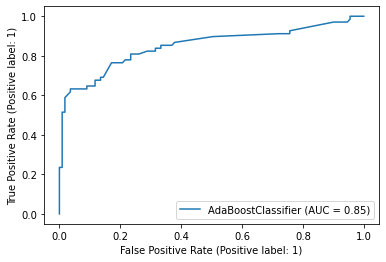

In [49]:
print("Accuracy: {}".format(metrics.accuracy_score(y2_test, pred_abc_final)))
print("Precision: {}".format(metrics.precision_score(y2_test, pred_abc_final, pos_label = True)))
print("Recall: {}".format(metrics.recall_score(y2_test, pred_abc_final, pos_label = True)))
print("F1 score: {}".format(metrics.f1_score(y2_test, pred_abc_final)))
print("Area Under Curve (AUC): {}".format(metrics.roc_auc_score(y2_test, [p[1] for p in abc_final.predict_proba(X2_test)])))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y2_test, pred_abc_final))
_ = metrics.RocCurveDisplay.from_estimator(abc_final, X2_test, y2_test)

The below code will cross-validate the model to further check the accuracy.  It reports a score that is slightly less than the previous test.

In [50]:
# evaluate the model
cv_abc = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_abc = cross_val_score(abc_final, X2_test, y2_test, scoring='accuracy', cv=cv_abc, n_jobs=-1, error_score='raise')
# report performance
print('Adaboost Accuracy: %.3f (%.3f)' % (mean(n_scores_abc), std(n_scores_abc)))

Adaboost Accuracy: 0.752 (0.091)


Now we will examine the importance of individual features as it relates to the impact on the final Adaboost prediction.  We observe that being male or female has a significant impact on the final prediction. The family feature is also significant in the final prediction.  It is interesting to note that only six of the features have any significant impact in the final prediction.

<BarContainer object of 13 artists>

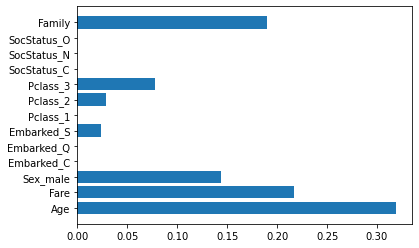

In [51]:
plt.barh(X2_train.columns, abc_final.feature_importances_)

Now let us evaluate the Random Forest classifier. Again we will generate the final model and evaluate the model.

In [52]:
rfc_final =  RandomForestClassifier(n_estimators=400, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=3, ccp_alpha=0.001, bootstrap=True, random_state=1234).fit(X2_train, y2_train)
pred_rfc_final = rfc_final.predict(X2_test)

Accuracy: 0.8435754189944135
Precision: 0.9166666666666666
Recall: 0.6470588235294118
F1 score: 0.7586206896551724
Area Under Curve (AUC): 0.8707604663487016

Confusion Matrix:
[[107   4]
 [ 24  44]]


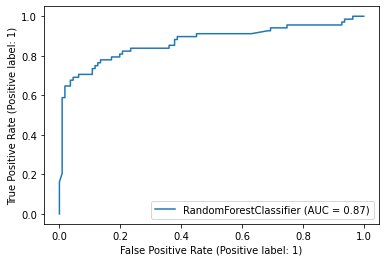

In [53]:
print("Accuracy: {}".format(metrics.accuracy_score(y2_test, pred_rfc_final)))
print("Precision: {}".format(metrics.precision_score(y2_test, pred_rfc_final, pos_label = True)))
print("Recall: {}".format(metrics.recall_score(y2_test, pred_rfc_final, pos_label = True)))
print("F1 score: {}".format(metrics.f1_score(y2_test, pred_rfc_final)))
print("Area Under Curve (AUC): {}".format(metrics.roc_auc_score(y2_test, [p[1] for p in rfc_final.predict_proba(X2_test)])))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y2_test, pred_rfc_final))
_ = metrics.RocCurveDisplay.from_estimator(rfc_final, X2_test, y2_test)

As before, we will use cross-validation to further evaluate the model.  The reported difference compared to above is noticeable (0.83 versus 0.78) but not significant.

In [54]:
# evaluate the model
cv_rfc = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_rfc = cross_val_score(rfc_final, X2_test, y2_test, scoring='accuracy', cv=cv_rfc, n_jobs=-1, error_score='raise')
# report performance
print('Random Forest Accuracy: %.3f (%.3f)' % (mean(n_scores_rfc), std(n_scores_rfc)))

Random Forest Accuracy: 0.795 (0.088)


In examining the feature importances, again we see that being male or female has a significant impact on the final prediction. Also similar to the Ababoost model, the fare paid and age of the passenger had a big impact. However, the biggest difference is that whether the passenger had family on board had far less of an impact on the final prediction.

<BarContainer object of 13 artists>

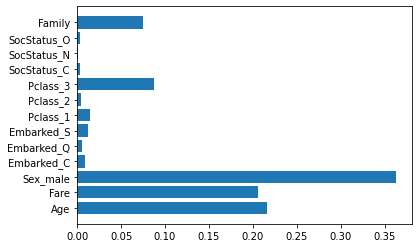

In [55]:
plt.barh(X2_train.columns, rfc_final.feature_importances_)

## 7) Discussion and Conclusion

In predicting the survivors of the Titanic, in this particular analysis the Random Forest model (with tuning) was superior to the Adaboost model. The RFC implementation was superior in all facets: accuracy, precision, recall, F1 score, AUC). It also had the greater accuracy after cross-validation was performed.

Let us now analyze the finaldata to determine if we can understand the results in a real-world context. The AdaBoost model listed "Age" as the most important feature in the prediction.  For the Random Forest, it was "Sex_male" that was most important in predicting survival of the sinking.  Before considering the reasons, let us re-examine the correlation matrix.

In [62]:
corr_final = data.corr()
corr_final

,Survived,Age,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,SocStatus_C,SocStatus_N,SocStatus_O,Family
Survived,1.000000,-0.069809,0.257307,-0.543351,0.168240,0.003650,-0.149683,0.285904,0.093349,-0.322308,0.012054,0.033391,-0.031316,0.016639
Age,-0.069809,1.000000,0.091566,0.084153,0.032024,-0.013855,-0.019336,0.319916,0.006589,-0.281004,-0.189872,0.068799,0.177484,-0.248512
Fare,0.257307,0.091566,1.000000,-0.182333,0.269335,-0.117216,-0.162184,0.591711,-0.118557,-0.413333,-0.016275,0.015044,0.010357,0.217138
Sex_male,-0.543351,0.084153,-0.182333,1.000000,-0.082853,-0.074115,0.119224,-0.098013,-0.064746,0.137143,-0.075638,-0.007483,0.089228,-0.200988
Embarked_C,0.168240,0.032024,0.269335,-0.082853,1.000000,-0.148258,-0.782742,0.296423,-0.125416,-0.153329,-0.030095,0.079020,-0.008034,-0.046215
Embarked_Q,0.003650,-0.013855,-0.117216,-0.074115,-0.148258,1.000000,-0.499421,-0.155342,-0.127301,0.237449,-0.000311,-0.023105,0.012618,-0.058592
Embarked_S,-0.149683,-0.019336,-0.162184,0.119224,-0.782742,-0.499421,1.000000,-0.161921,0.189980,-0.015104,0.026561,-0.054685,-0.000902,0.077359
Pclass_1,0.285904,0.319916,0.591711,-0.098013,0.296423,-0.155342,-0.161921,1.000000,-0.288585,-0.626738,-0.155640,0.132798,0.104919,-0.046114
Pclass_2,0.093349,0.006589,-0.118557,-0.064746,-0.125416,-0.127301,0.189980,-0.288585,1.000000,-0.565210,-0.056827,-0.038324,0.084401,-0.038594
Pclass_3,-0.322308,-0.281004,-0.413333,0.137143,-0.153329,0.237449,-0.015104,-0.626738,-0.565210,1.000000,0.180349,-0.083230,-0.159089,0.071142


<AxesSubplot:>

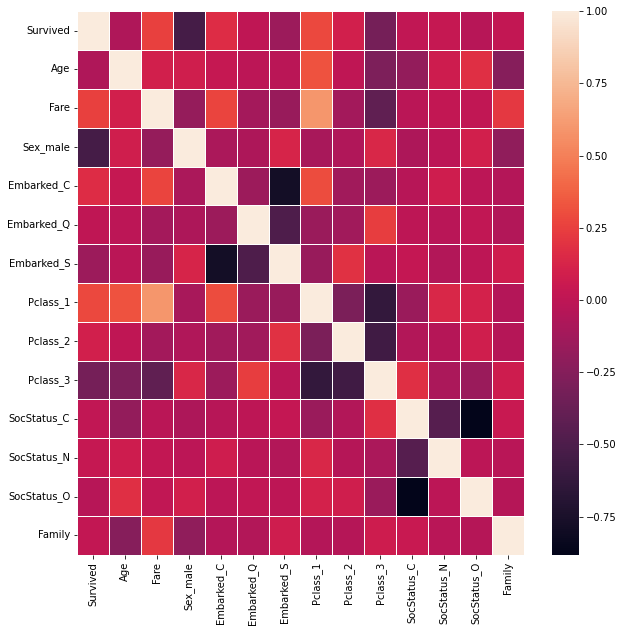

In [63]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_final, linewidths=1)

Being male and older had a negative relationship with survival.  Knowing context makes this result understandable.  The famous maritime tradition of "woman and children first" holds true for this tragedy.  Thus, being young (ie children) or a woman would statistically make sense in the higher chance of survival.  This would also explain why "Family" was also a signicant feature in both models (more so in the AdaBoost implementation).

The other two significant features that should be examine are "Fare" and "Pclass_3".  Examining the correlation matrix, the paid fare had a positive relationship with survival.  However, being a 3rd Class passenger had a negative relationship.  Again, knowing context, the reason for this in understandable.  Passengers in 1st class naturally paid more to travel on the ship.  Also, the 1st Class cabins were located nearest to the deck of the ship and the lifeboats.  The 3rd class cabins were located further into the ship.  Given that the impact with the iceberg happened at night, most individuals would have been in their cabins.  Thus, they would have been the first cabins impacted by the flooding.

In the initial introduction to this study, it was mentioned whether it was possible to generalize the findings to other similar tragedies.  This can be true to a certain extent.  The sinking of the Titanic resulted in many safety measures being legislated given the various failures experienced during the tragedy.  Thus in a manner of speaking, this can be viewed as generalizing this to other equivalent events.

However, this can also be the danger in trying to apply a historical event to others.  The sinking of the Lusitania happened only three years after the Titanic in roughly the same area of the Atlantic.  However, the Lusitania was struck by a German submarine torpedo and exploded.  It sank in approximately 20 minutes.  The Titanic took nearly 3 hours to sink.  The Costa Concordia capsized when entering into port and was thus a short swim from land.  Thus rescue efforts were significantly easier.

## 8) References

Please note for the sake of academic honesty that this is one of the competition challenges on Kaggle.  Thus there are plenty of examples of this data being analyzed.  Below I have listed some of the items that were referenced for this final project.

1. https://www.kaggle.com/code/aieducation/titanic-eda-lightgbm-gridsearchcv
2. https://www.kaggle.com/code/kenjee/titanic-project-example/notebook
3. https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8